In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df=pd.read_csv(r'C:\Users\bivin\OneDrive\Desktop\50_startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df=df.rename({'R&D Spend':'rds','Administration':'ads','Marketing Spend':'mksp'},axis=1)
df.head()

,rds,ads,mksp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe(include='all')

,rds,ads,mksp,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [6]:
# check for duplicated values
df[df.duplicated]

,rds,ads,mksp,State,Profit


## correlation analysis

In [7]:
df.corr()

C:\Users\bivin\AppData\Local\Temp\ipykernel_3644\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rds,ads,mksp,Profit
rds,1.000000,0.241955,0.724248,0.972900
ads,0.241955,1.000000,-0.032154,0.200717
mksp,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


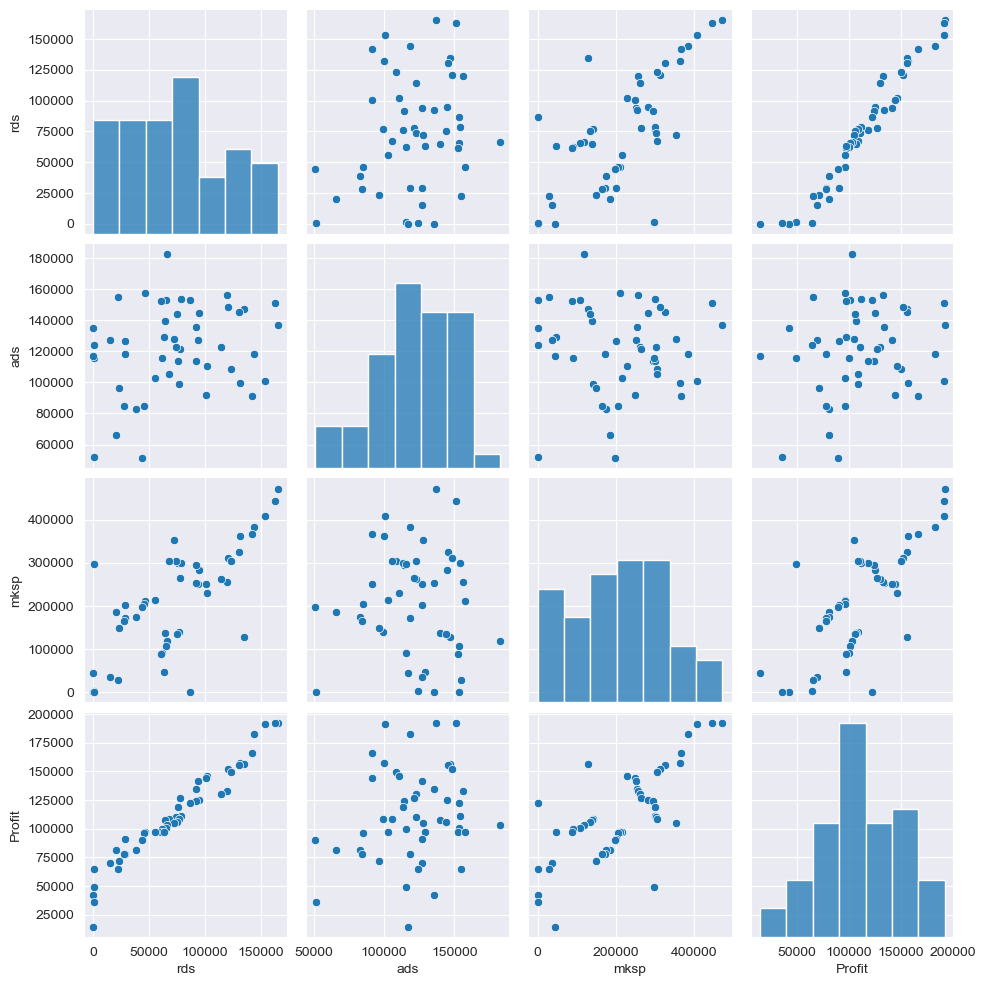

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

## model  building

In [9]:
model=smf.ols('Profit~rds+ads+mksp',data=df).fit()
model

In [10]:
##finding parameters
model.params

Intercept    50122.192990
rds              0.805715
ads             -0.026816
mksp             0.027228
dtype: float64

In [11]:
## finding p values and t values
np.round(model.pvalues,5)


Intercept    0.00000
rds          0.00000
ads          0.60176
mksp         0.10472
dtype: float64

In [12]:
model.tvalues

Intercept     7.626218
rds          17.846374
ads          -0.525507
mksp          1.655077
dtype: float64

In [13]:
## finding accuracy of the model
model.rsquared,model.rsquared_adj
## model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [14]:
## here 'ads','mksp' are the insignificant variables so lets build simple,multiple regression model for them
slr1=smf.ols('Profit~ads',data=df).fit()
slr1.tvalues , slr1.pvalues


(Intercept    3.040044
 ads          1.419493
 dtype: float64,
 Intercept    0.003824
 ads          0.162217
 dtype: float64)

In [15]:
## 'ads' has insignificant pvalues(greater than alpha,assume alpha=0.05)

In [16]:
slr2=smf.ols('Profit~mksp',data=df).fit()
slr2.tvalues , slr2.pvalues

(Intercept    7.808356
 mksp         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 mksp         4.381073e-10
 dtype: float64)

In [17]:
## mksp has significant p value (less than alpha)

In [18]:
mlr=smf.ols('Profit~ads+mksp',data=df).fit()
mlr.tvalues , mlr.pvalues ## variables has significant pvalues 

(Intercept    1.142741
 ads          2.467779
 mksp         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ads          1.729198e-02
 mksp         9.727245e-11
 dtype: float64)

# Model validation

In [19]:
## collinearity method by calculating vif
## vif=1/(1-rsquared value)

rsq1=smf.ols('rds~mksp+ads',data=df).fit().rsquared
vif1=1/(1-rsq1)

rsq2=smf.ols('ads~mksp+rds',data=df).fit().rsquared
vif2=1/(1-rsq2)

rsq3=smf.ols('mksp~rds+ads',data=df).fit().rsquared
vif3=1/(1-rsq3)

vif1,vif2,vif3

(2.4689030699947017, 1.1750910070550453, 2.3267732905308773)

In [20]:
### no vif>20,so there is no collinearity

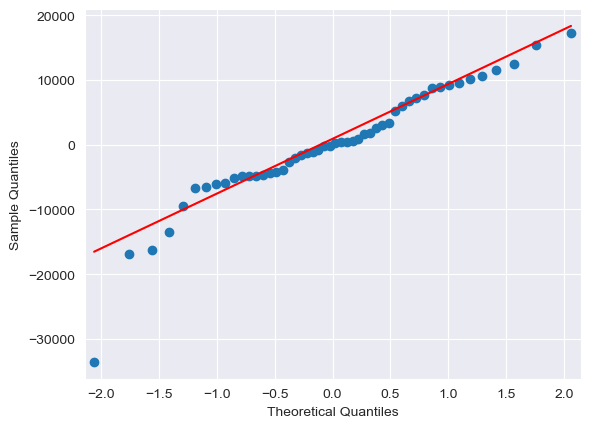

In [21]:
## test for normality by q-q plot(RESIDUAL ANALYSIS)
sm.qqplot(model.resid,line='q');

In [22]:
np.argmax(model.resid), np.max(model.resid)

(45, 17275.43031309361)

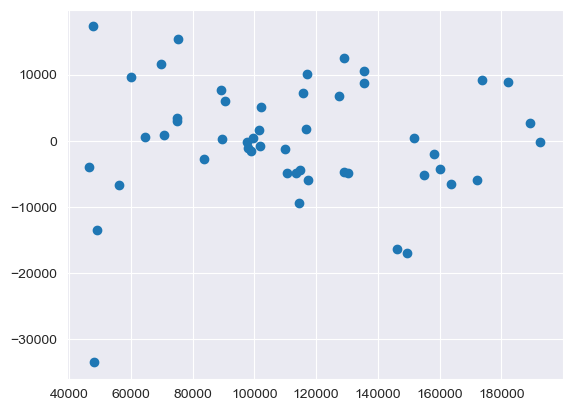

In [23]:
## test for homoscedacity by plotting modls fitted values vs models residuals values

plt.scatter(model.fittedvalues,model.resid)

In [24]:
## there is pattern ,so the test fails

eval_env: 1


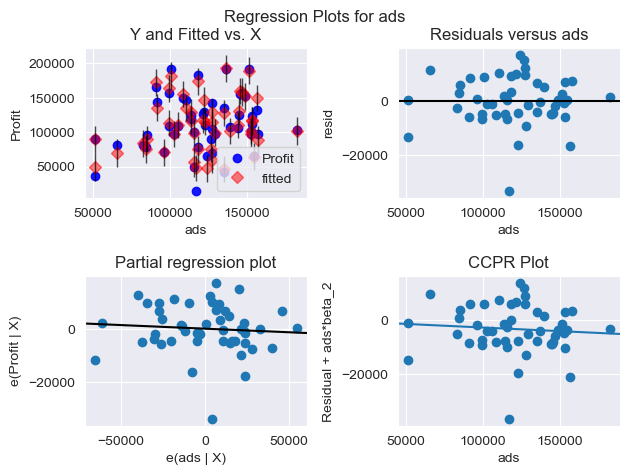

In [25]:
## test for residual vs regressor
sm.graphics.plot_regress_exog(model,'ads');


eval_env: 1


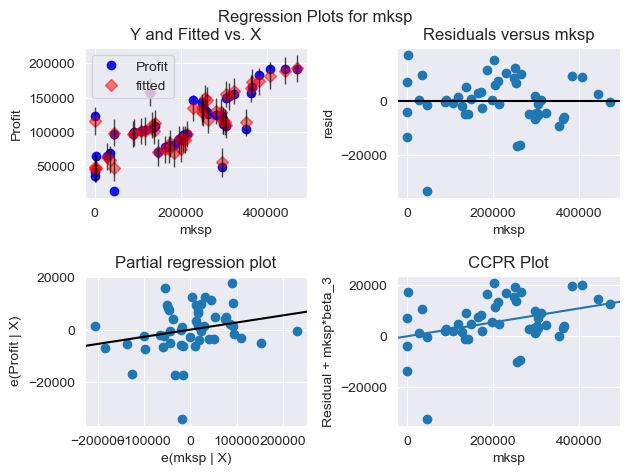

In [26]:
sm.graphics.plot_regress_exog(model,'mksp');

eval_env: 1


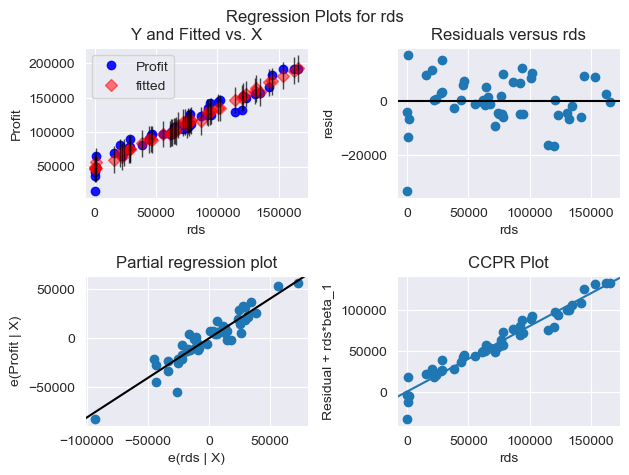

In [27]:
sm.graphics.plot_regress_exog(model,'rds');


# Model deletion diagnostic

In [28]:
# cook's distance method to find influence data
c, p=model.get_influence().cooks_distance

In [29]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [30]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

<StemContainer object of 3 artists>

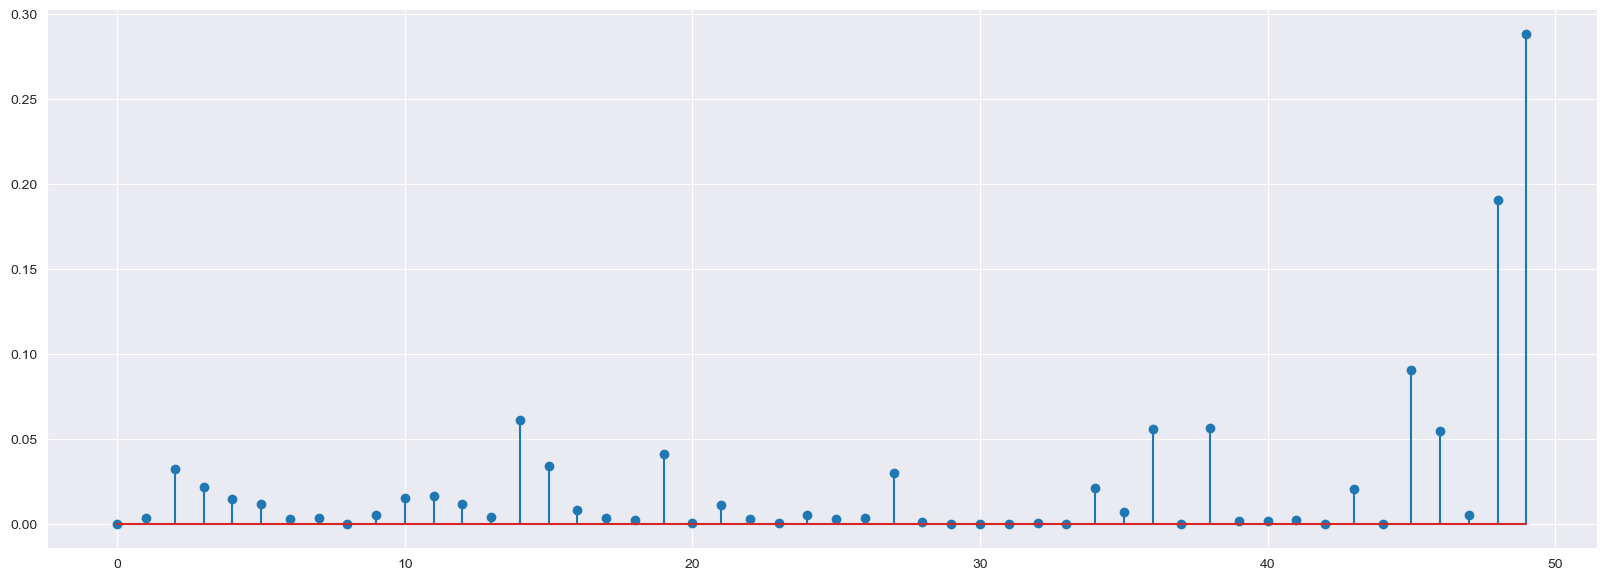

In [31]:
fig=plt.figure(figsize=(20,7))
plt.stem(c)

In [32]:
np.argmax(c),np.max(c)

(49, 0.28808229275432634)

In [33]:
## display the influencer/outlier row
df.iloc[['49']]

,rds,ads,mksp,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


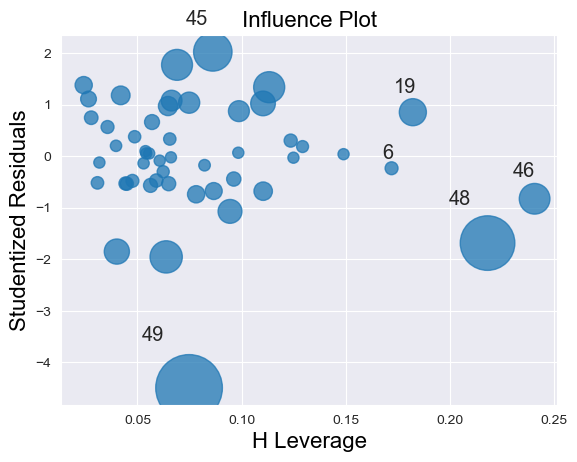

In [34]:
## leverage values
influence_plot(model);

In [35]:
##  leverage cutoff formula

k=len(df.columns)
n=len(df)

lv=3*(k+1)/n
lv

0.36

# improving the model

In [36]:
np.argmax(c) ## improve the model by deleting the 49th row

49

In [37]:
df

,rds,ads,mksp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
df.drop(index=49,inplace=True)

In [39]:
df

,rds,ads,mksp,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# creating final model

In [40]:
final_model=smf.ols('Profit~rds+ads+mksp',data=df).fit()

In [41]:
final_model.rsquared

0.9613162435129847

In [42]:
## the model accuracy has improved from 94.75% to 96.13%

# Model prediction

In [43]:
test=pd.DataFrame({
    'rds':[55000,60000,70000],
    'ads':[115000,97800,90000],
    'mksp':[154000,152600,45000]
     })
test

,rds,ads,mksp
0,55000,115000,154000
1,60000,97800,152600
2,70000,90000,45000


In [44]:
## manual prediction of price using test data
final_model.predict(test)

0     96780.363288
1    101041.909061
2    106329.960405
dtype: float64

In [45]:
## auutomatic predictions of price with 96.13% accuracy
ypred=final_model.predict(df)
ypred
price=pd.DataFrame(ypred)
price

,0
0,190716.676999
1,187537.122227
2,180575.526396
3,172461.144642
4,170863.486721
5,162582.583177
6,157741.338633
7,159347.735318
8,151328.826941
9,154236.846778


In [46]:
# Table containning R squared value for each prepared model
d2={'prepared model':['model','final model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,prepared model,Rsquared
0,model,0.950746
1,final model,0.961316
